In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind



In [181]:
asthma = pd.read_csv('Datasets/California_Asthma_Data_ADA.csv', header = 4)
aqi2015 = pd.read_csv('Datasets/annual_aqi_by_county_2015.csv')
aqi2016 = pd.read_csv('Datasets/annual_aqi_by_county_2016.csv')
aqi2017 = pd.read_csv('Datasets/annual_aqi_by_county_2017.csv')
aqi2018 = pd.read_csv('Datasets/annual_aqi_by_county_2018.csv')

asthmalist = ['County', 'Year', 'Asthma measure', 'Comparison', 'Group',
       'County prevalence', 'County 95% confidence interval',
       'California prevalence', 'California 95% confidence interval']
ca_asthma = asthma[asthmalist]

ca_aqi2015 = aqi2015.loc[aqi2015['State']=='California',:].reset_index(drop=True)
ca_aqi2016 = aqi2016.loc[aqi2016['State']=='California',:].reset_index(drop=True)
ca_aqi2017 = aqi2017.loc[aqi2017['State']=='California',:].reset_index(drop=True)
ca_aqi2018 = aqi2018.loc[aqi2018['State']=='California',:].reset_index(drop=True)

ca_aqi = pd.concat([ca_aqi2015, ca_aqi2016, ca_aqi2017, ca_aqi2018], axis = 0)
ca_asthma2015 = ca_asthma.loc[ca_asthma['Year']=='2015 2016',:].reset_index(drop=True)

ca_asthma2017 = ca_asthma.loc[ca_asthma['Year']=='2017 2018',:].reset_index(drop=True)

asthmaAQI = pd.merge(ca_aqi, ca_asthma2015, on=['County', 'County'])
asthmaAQI




,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7 17.9),14.80%,(14.0 15.7)
1,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Child vs. adult,0 17 years,18.40%,(6.2 30.6),14.50%,(12.2 16.8)
2,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Child vs. adult,18+ years,13.10%,(9.2 17.0),14.90%,(14.0 15.9)
3,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Age group,0 4 years,Not available,Not available,4.90%,(2.9 7.0)
4,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Age group,5 17 years,24.10%,(5.9 42.2),18.20%,(15.2 21.2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,California,Yolo,2018,365,260,91,5,7,2,0,...,114,2,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.80%,(0.5 15.1),8.30%,(7.7 8.9)
2992,California,Yolo,2018,365,260,91,5,7,2,0,...,114,2,2015 2016,Current asthma prevalence,Age group,0 4 years,Not available,Not available,4.50%,(2.3 6.6)
2993,California,Yolo,2018,365,260,91,5,7,2,0,...,114,2,2015 2016,Current asthma prevalence,Age group,5 17 years,Not available,Not available,12.30%,(9.7 14.9)
2994,California,Yolo,2018,365,260,91,5,7,2,0,...,114,2,2015 2016,Current asthma prevalence,Age group,18 64 years,Not available,Not available,8.10%,(7.4 8.9)


In [182]:
asthmaAQI = asthmaAQI[asthmaAQI["Asthma measure"].str.contains("Current asthma prevalence")]
asthmaAQI = asthmaAQI.replace('Not available', np.NaN)
asthmaAQI['County prevalence'] = np.char.rstrip(asthmaAQI['County prevalence'].values.astype('U'), '%').astype(float)
asthmaAQI = asthmaAQI[(asthmaAQI['Days with AQI'] >= 300) & (asthmaAQI['Days with AQI'] <= 370)]

asthmaAQI.to_csv('asthmaAQI.csv', index=False)
asthmaAQI.head()

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
7,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Total population,All ages,9.1,(5.9 12.2),8.70%,(8.1 9.3)
8,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.1,(3.9 26.4),10.10%,(8.2 12.0)
9,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.3,(4.0 10.7),8.30%,(7.7 8.9)
10,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,0 4 years,NaN,NaN,4.50%,(2.3 6.6)
11,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,5 17 years,19.4,(2.9 35.9),12.30%,(9.7 14.9)


In [196]:
asthmaAQI = asthmaAQI.rename(columns={'County prevalence': 'County_prevalence', 'Max AQI': 'Max_AQI', 'Year_x': 'Year'})



In [195]:
asthmaAQI['County_prevalence'].replace(., np.NaN)

SyntaxError: invalid syntax (1920378152.py, line 1)

In [187]:
la_asthmaAQI = asthmaAQI.loc[asthmaAQI['County'] == 'Los Angeles']
la_asthmaAQI


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days Ozone,Days PM2.5,Days PM10,Asthma measure,Comparison,Group,County_prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
931,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Total population,All ages,7.8,(6.6 9.0),8.70%,(8.1 9.3)
932,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Child vs. adult,0 17 years,10.1,(6.0 14.2),10.10%,(8.2 12.0)
933,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Child vs. adult,18+ years,7.1,(6.0 8.2),8.30%,(7.7 8.9)
934,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Age group,0 4 years,NaN,NaN,4.50%,(2.3 6.6)
935,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Age group,5 17 years,13.2,(7.3 19.1),12.30%,(9.7 14.9)
936,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Age group,18 64 years,6.9,(5.6 8.1),8.10%,(7.4 8.9)
937,California,Los Angeles,2015,365,26,207,95,36,1,0,...,189,149,2,Current asthma prevalence,Age group,65+ years,8.4,(5.6 11.2),9.20%,(8.0 10.4)
945,California,Los Angeles,2016,366,32,230,81,19,4,0,...,174,157,2,Current asthma prevalence,Total population,All ages,7.8,(6.6 9.0),8.70%,(8.1 9.3)
946,California,Los Angeles,2016,366,32,230,81,19,4,0,...,174,157,2,Current asthma prevalence,Child vs. adult,0 17 years,10.1,(6.0 14.2),10.10%,(8.2 12.0)
947,California,Los Angeles,2016,366,32,230,81,19,4,0,...,174,157,2,Current asthma prevalence,Child vs. adult,18+ years,7.1,(6.0 8.2),8.30%,(7.7 8.9)


In [188]:
la_asthmaAQI = la_asthmaAQI.dropna(subset=['Max_AQI', 'County_prevalence'])

In [189]:
max_aqi_std = np.std(max_aqi)
county_asthma_prevalence_std = np.std(county_asthma_prevalence)
print('Standard deviation of Max AQI: {}'.format(max_aqi_std))
print('Standard deviation of county asthma prevalence: {}'.format(county_asthma_prevalence_std))

Standard deviation of Max AQI: 9.013878188659973
Standard deviation of county asthma prevalence: 2.184350907910377


In [190]:
max_aqi = la_asthmaAQI['Max_AQI']
county_asthma_prevalence = la_asthmaAQI['County_prevalence']

# Calculate the mean and standard deviation of each variable
max_aqi_mean = np.mean(max_aqi)
max_aqi_std = np.std(max_aqi)
county_asthma_prevalence_mean = np.mean(county_asthma_prevalence)
county_asthma_prevalence_std = np.std(county_asthma_prevalence)

# Perform the t-test
t_stat, p_value = ttest_ind(max_aqi, county_asthma_prevalence, equal_var=False)

# Print the results
print('Max AQI mean: {:.2f}'.format(max_aqi_mean))
print('County asthma prevalence mean: {:.2f}'.format(county_asthma_prevalence_mean))
print('t-statistic: {:.2f}'.format(t_stat))
print('p-value: {:.4f}'.format(p_value))

Max AQI mean: 209.50
County asthma prevalence mean: 8.92
t-statistic: 103.72
p-value: 0.0000


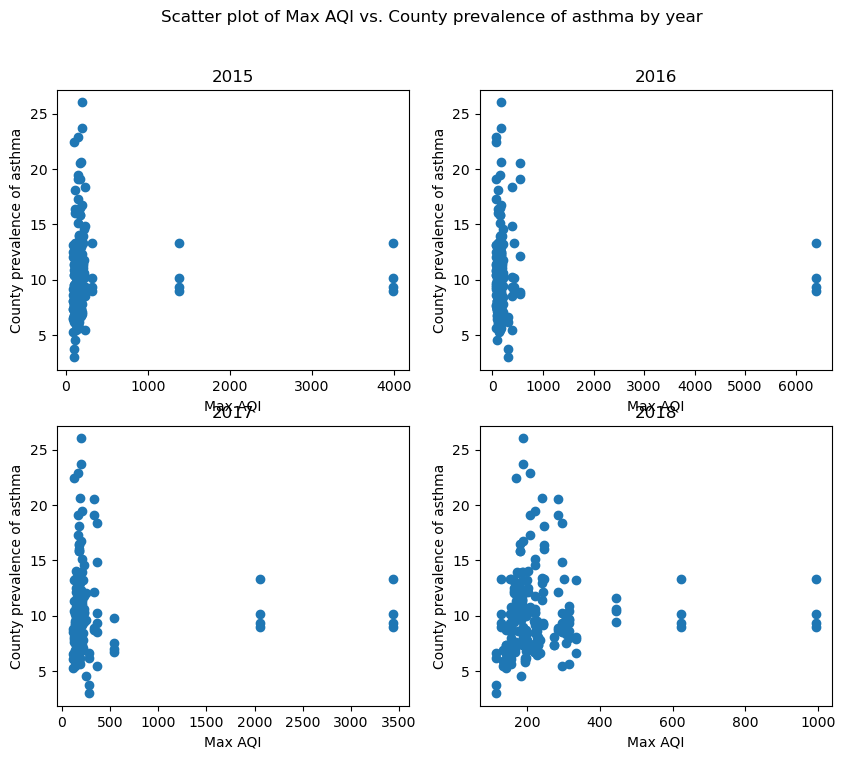

In [192]:
# Filter the data by year
asthma2015 = asthmaAQI.loc[asthmaAQI['Year'] == 2015]
asthma2016 = asthmaAQI.loc[asthmaAQI['Year'] == 2016]
asthma2017 = asthmaAQI.loc[asthmaAQI['Year'] == 2017]
asthma2018 = asthmaAQI.loc[asthmaAQI['Year'] == 2018]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the data for each year
axs[0, 0].scatter(asthma2015['Max_AQI'], asthma2015['County_prevalence'])
axs[0, 1].scatter(asthma2016['Max_AQI'], asthma2016['County_prevalence'])
axs[1, 0].scatter(asthma2017['Max_AQI'], asthma2017['County_prevalence'])
axs[1, 1].scatter(asthma2018['Max_AQI'], asthma2018['County_prevalence'])

# Add axis labels and a title for each subplot
axs[0, 0].set_xlabel('Max AQI')
axs[0, 0].set_ylabel('County prevalence of asthma')
axs[0, 0].set_title('2015')

axs[0, 1].set_xlabel('Max AQI')
axs[0, 1].set_ylabel('County prevalence of asthma')
axs[0, 1].set_title('2016')

axs[1, 0].set_xlabel('Max AQI')
axs[1, 0].set_ylabel('County prevalence of asthma')
axs[1, 0].set_title('2017')

axs[1, 1].set_xlabel('Max AQI')
axs[1, 1].set_ylabel('County prevalence of asthma')
axs[1, 1].set_title('2018')

# Add a main title for the whole plot
fig.suptitle('Scatter plot of Max AQI vs. County prevalence of asthma by year')

# Show the plot
plt.show()

In [98]:
# # ca_aqi.sort_values('Max AQI')
# ca_aqiVH = ca_aqi.loc[ca_aqi['Max AQI'] > 201]
# ca_aqiVH.sort_values('Max AQI')
# # 


In [99]:
# ca_aqimeep = ca_aqi.loc[ca_aqi['County'] == 'Los Angeles']
# ca_aqimeep


comparing two counties and their max aqi 


How asthma rates in these two counties changed by year + aqi
years
max aqi
asthma rates